[*********************100%***********************]  1 of 1 completed
<ipython-input-2-5e48593e8cba>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').mean()


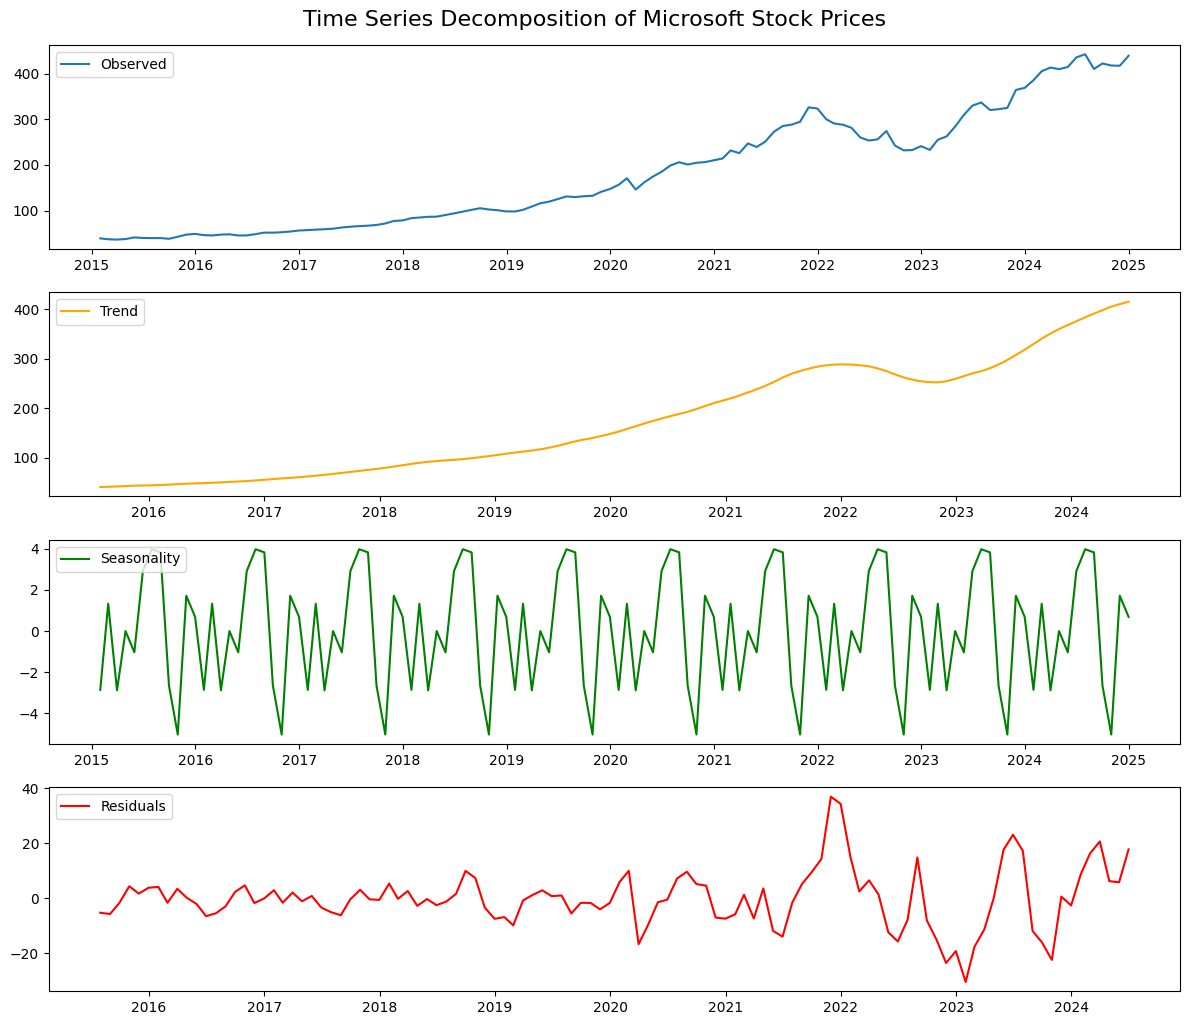

In [2]:
# Install dependencies
!pip install yfinance statsmodels matplotlib --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load Microsoft Stock Data (Close Price)
msft = yf.download("MSFT", start="2015-01-01", end="2024-12-31")
data = msft[['Close']].dropna()

# Step 2: Resample to Monthly (for clearer trend/seasonal pattern)
monthly_data = data['Close'].resample('M').mean()

# Step 3: Decompose time series
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)  # 12 months = yearly cycle

# Step 4: Plot the decomposition
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Time Series Decomposition of Microsoft Stock Prices", fontsize=16, y=1.02)
plt.show()
